<a href="https://colab.research.google.com/github/IqraMuzaffar/Global_terrorism_EDA/blob/main/EDA_terrorist_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis-EDA of Global terrorism**

 Performing Exploratory data analysis on the dataset at kaggle: (https://www.kaggle.com/datasets/START-UMD/gtd)



# **Importing Libraries and Data**




In [11]:
# //importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# Importing the dataset
Terror_df=pd.read_csv('/content/globalterrorismdb_0718dist.csv'  , encoding='latin')
pd.set_option("display.max_columns",700) #max coulmns

<ipython-input-60-a1a3cda0c851>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  Terror_df=pd.read_csv('/content/globalterrorismdb_0718dist.csv'  , encoding='latin')


In [61]:
Terror_df.shape #no of (rows, columns)

(181691, 135)

In [14]:
Terror_df.head(2) #displays 1st two records

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN


# **Cleaning the data**



***Column Extraction***

In [62]:
#list of columns required
terror_cols=['iyear','imonth','iday','country_txt','city','latitude',
      'longitude','location','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1',
      'gname','motive','weaptype1_txt','dbsource','region_txt','nkill','nwound','natlty1_txt','weapdetail'
      ]
#creating a new dataframe with only the required columns as in the list above
terror_new_df=pd.DataFrame(data=Terror_df, columns=terror_cols)
terror_new_df.shape #21 columns now

(181691, 21)

***Renaming***

In [63]:
terror_new_df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
terror_new_df.head(1)

,Year,Month,Day,Country,City,Latitude,Longitude,Location,Attack Type,Target Type,targsubtype1_txt,target1,Group Name,Motive,Weapon Type,dbsource,Region,Killed,Wounded,natlty1_txt,weapdetail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN


**Analyzing and filling the null values**

In [64]:
terror_new_df.isnull().sum()

Year                     0
Month                    0
Day                      0
Country                  0
City                   434
Latitude              4556
Longitude             4557
Location            126196
Attack Type              0
Target Type              0
targsubtype1_txt     10373
target1                636
Group Name               0
Motive              131130
Weapon Type              0
dbsource                 0
Region                   0
Killed               10313
Wounded              16311
natlty1_txt           1559
weapdetail           67670
dtype: int64

In [65]:
#filling the killed and wounded null values with 0s.
terror_new_df["Killed"]=terror_new_df["Killed"].fillna(0)
terror_new_df["Wounded"]=terror_new_df["Wounded"].fillna(0)
#new feature extracted
terror_new_df["Casualty"]=terror_new_df["Killed"]+terror_new_df["Wounded"]
terror_new_df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# **Statistical Data**

In [66]:
print("Country with highest Terrorist attacks:" , terror_new_df['Country'].value_counts().idxmax())
print("Year with highest Terrorist attacks:" , terror_new_df['Year'].value_counts().idxmax())
print("Region with highest no of Terrorist attacks:", terror_new_df['Region'].value_counts().idxmax())


Country with highest Terrorist attacks: Iraq
Year with highest Terrorist attacks: 2014
Region with highest no of Terrorist attacks: Middle East & North Africa


# **Data Visualization**

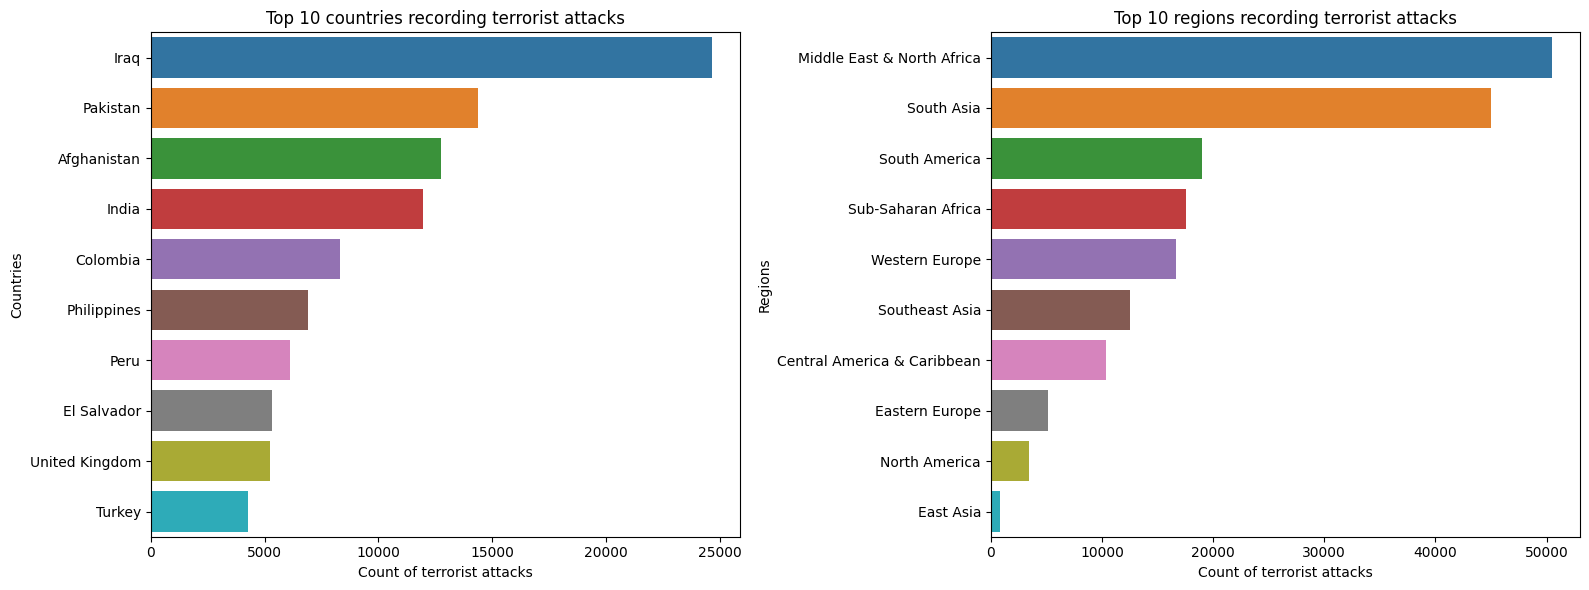

In [67]:
top_countries = terror_new_df['Country'].value_counts().head(10)

#top 10 regions with the most terrorist attacks
top_regions = terror_new_df['Region'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# top 10 countries
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[0], orient='h')
axes[0].set_xlabel('Count of terrorist attacks')
axes[0].set_ylabel('Countries')
axes[0].set_title('Top 10 countries recording terrorist attacks')

sns.barplot(x=top_regions.values, y=top_regions.index, ax=axes[1], orient='h')
axes[1].set_xlabel('Count of terrorist attacks')
axes[1].set_ylabel('Regions')
axes[1].set_title('Top 10 regions recording terrorist attacks')

#  spacing
plt.tight_layout()
plt.show()



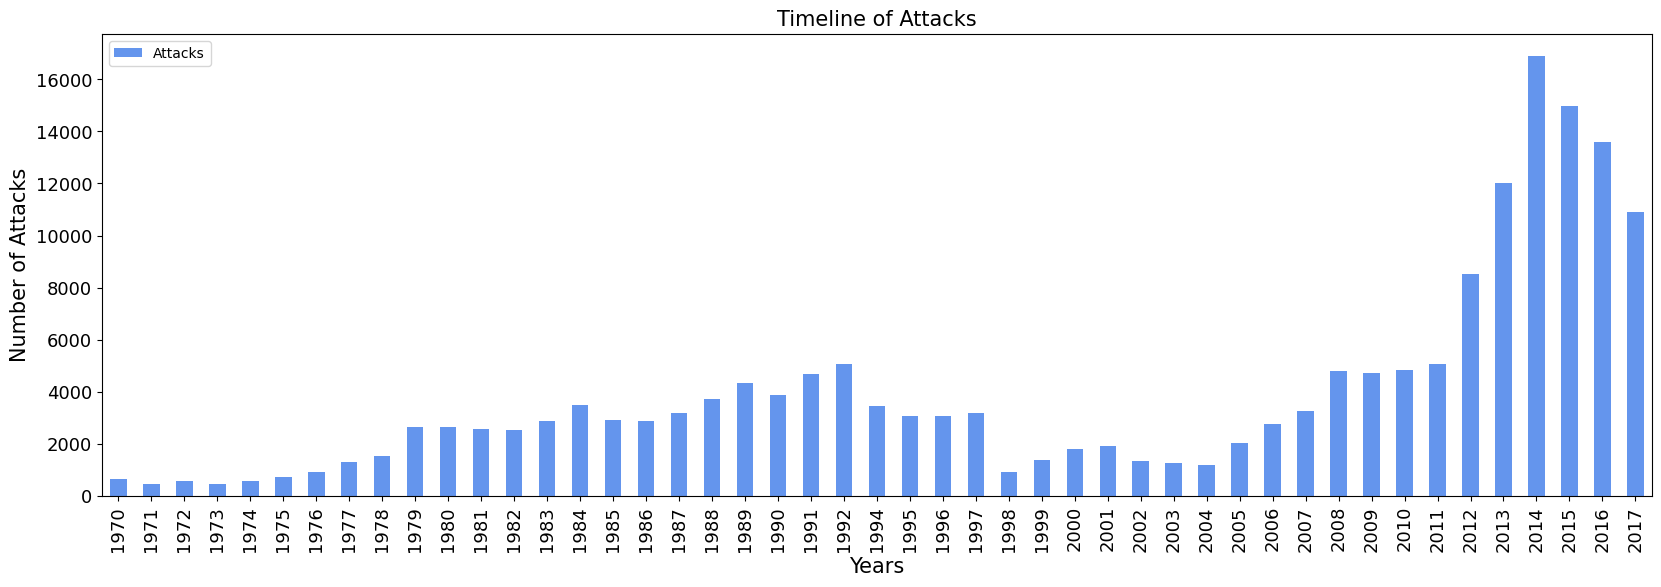

In [71]:
attacks=terror_new_df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()
attacks.plot(kind="bar",color="cornflowerblue",figsize=(20,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

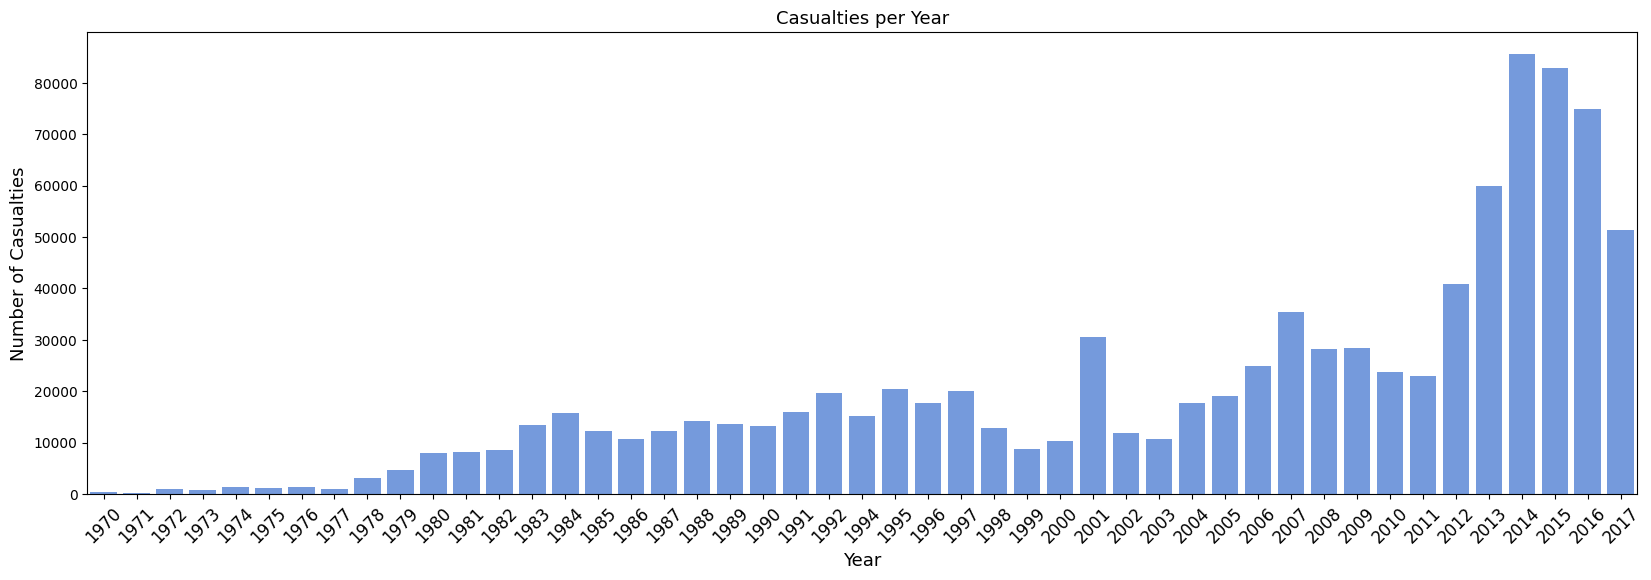

In [70]:


yearly_casualties = terror_new_df.groupby('Year')['Casualty'].sum()

# Create a bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x=yearly_casualties.index, y=yearly_casualties.values, color="cornflowerblue")
plt.title("Casualties per Year", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of Casualties", fontsize=13)
plt.xticks(rotation=45, fontsize=12)
plt.show()


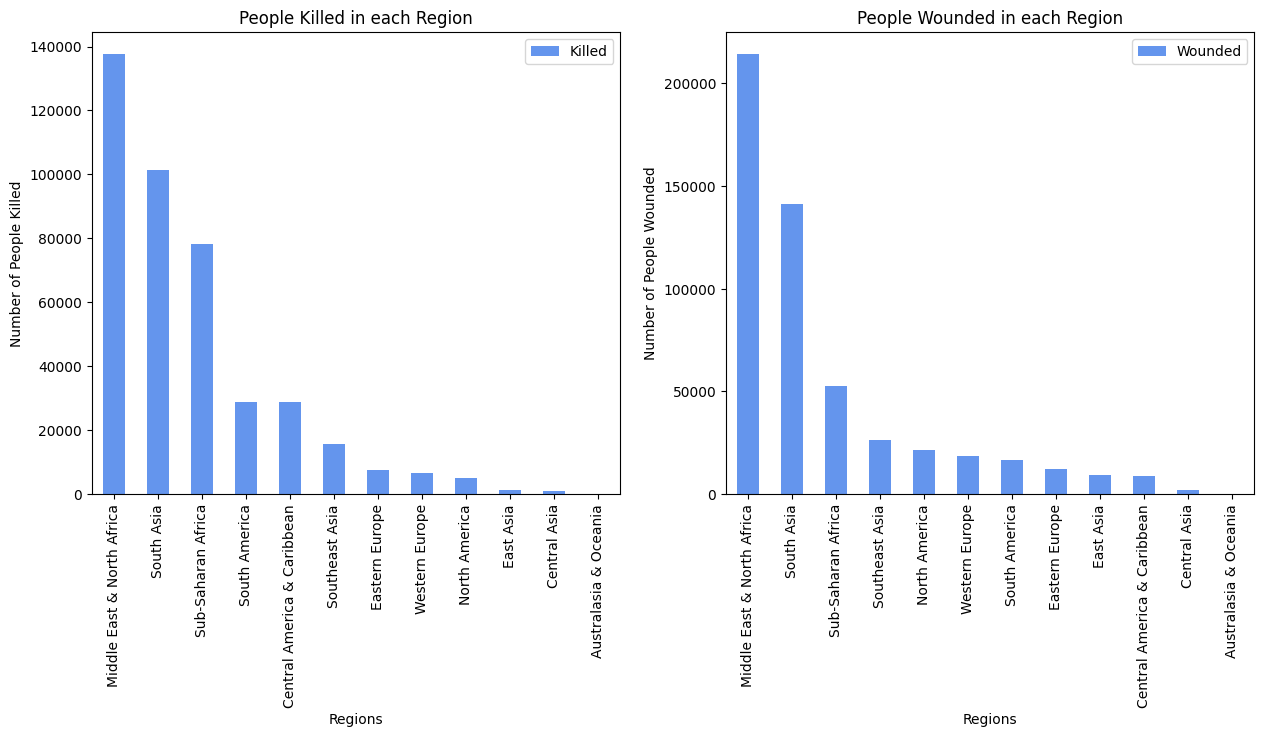

In [75]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

rk=terror_new_df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rw=terror_new_df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [86]:
terr = terror_new_df[terror_new_df['Group Name'] != 'Unknown']

Terror_Group_Org = terr['Group Name'].value_counts().reset_index()

Terror_Group_Org.rename(columns={"index": 'Group_name', "Group Name": 'Counts'}, inplace=True)

# Now, you have a DataFrame 'Terror_Group_Org' with two columns: 'Group_name' and 'Counts'


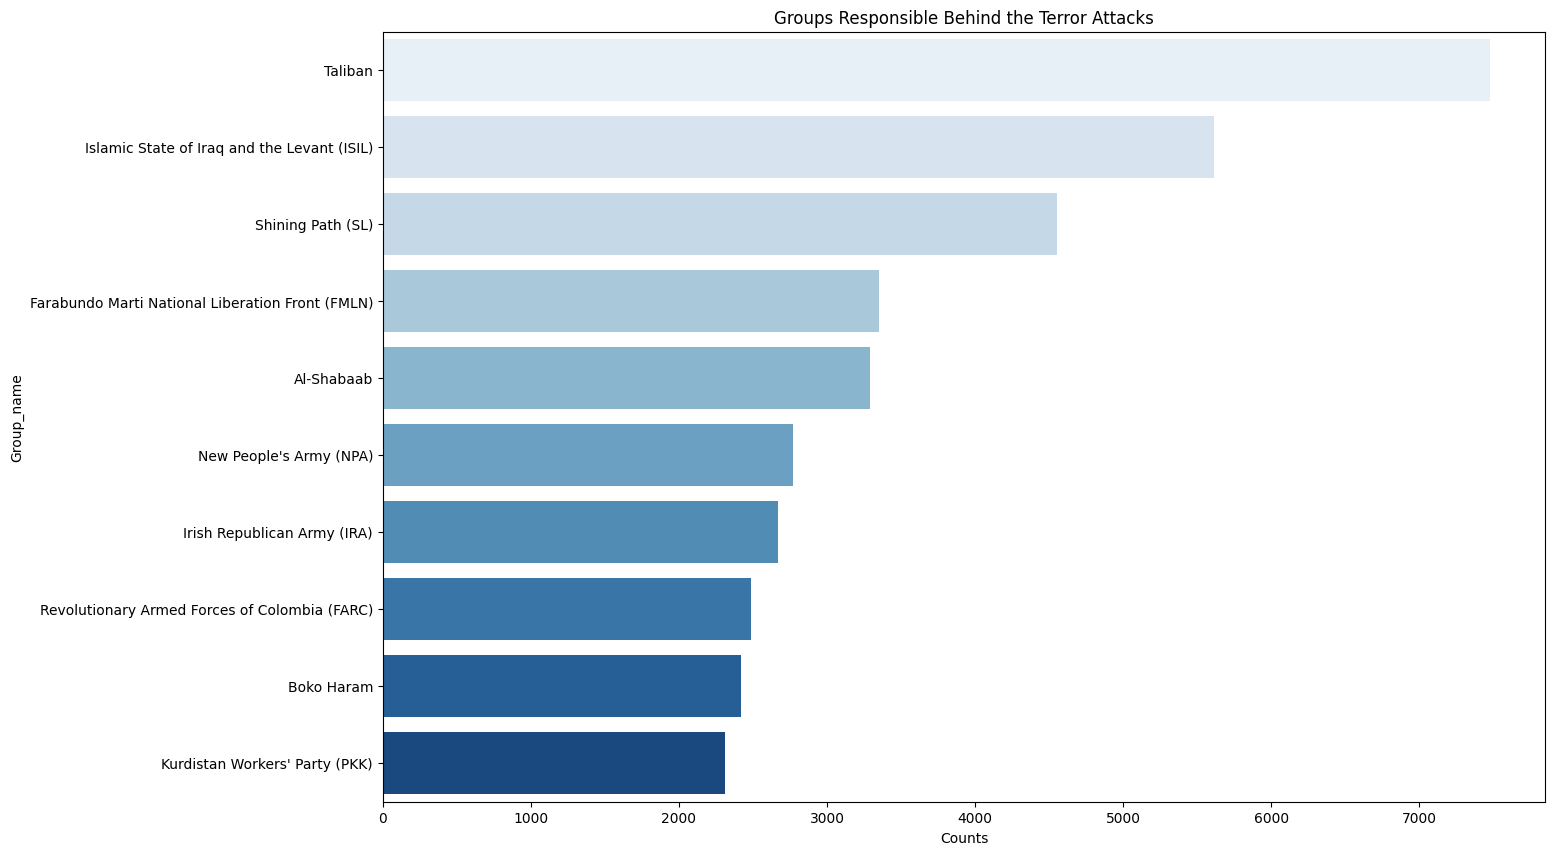

In [87]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="Group_name", data=Terror_Group_Org[:10],
                 palette="Blues").set_title('Groups Responsible Behind the Terror Attacks')